### Import libraries 

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

### Loading and splitting data

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
print("Training image: {}".format(x_train.shape))
print('Testing images: {}'.format(x_test.shape))

Training image: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


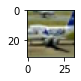

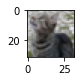

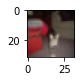

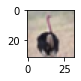

In [ ]:
for i in range(332,336):
    plt.subplot(120+1+i)
    img=x_train[i]
    plt.imshow(img)
    plt.show()

### Preprocessing the data

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


x_train/=255
x_test=x_test/255
n_classes=10


print("Shape before one-hot encoding:",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",y_train.shape)

Shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding: (50000, 10)


### Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


model=Sequential()
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3,),strides=(1,1), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(125,kernel_size=(3,3,),strides=(1,1), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(500,activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation ='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

model.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
391/391 [==============================] - 21s 47ms/step - loss: 1.5563 - accuracy: 0.4279 - val_loss: 1.1435 - val_accuracy: 0.6016
Epoch 2/30
391/391 [==============================] - 18s 45ms/step - loss: 1.0586 - accuracy: 0.6259 - val_loss: 0.8830 - val_accuracy: 0.6999
Epoch 3/30
391/391 [==============================] - 18s 45ms/step - loss: 0.8833 - accuracy: 0.6911 - val_loss: 0.7894 - val_accuracy: 0.7207
Epoch 4/30
391/391 [==============================] - 18s 45ms/step - loss: 0.7799 - accuracy: 0.7287 - val_loss: 0.7146 - val_accuracy: 0.7511
Epoch 5/30
391/391 [==============================] - 17s 45ms/step - loss: 0.6993 - accuracy: 0.7543 - val_loss: 0.6988 - val_accuracy: 0.7560
Epoch 6/30
391/391 [==============================] - 18s 45ms/step - loss: 0.6296 - accuracy: 0.7806 - val_loss: 0.6767 - val_accuracy: 0.7644
Epoch 7/30
391/391 [==============================] - 17s 45ms/step - loss: 0.5759 - accuracy: 0.7992 - val_loss: 0.6710 - val_accuracy:

### Prediction 

In [ ]:
classes =range(0,10)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))

batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

predictions= model.predict(batch,verbose=1)


1/1 [==============================] - 0s 198ms/step


In [ ]:
print(predictions)

[[4.5310861e-07 7.0720041e-08 2.4497859e-02 6.8315057e-05 7.9458231e-01
  9.2237785e-02 4.9888456e-07 8.8611715e-02 9.0508104e-07 5.1949719e-08]
 [7.3007075e-05 4.7155660e-05 2.1999963e-01 1.0825542e-01 1.1619895e-02
  6.2002748e-01 2.0641167e-02 1.9183423e-02 1.0404182e-04 4.8902108e-05]
 [7.2047840e-11 1.5597919e-10 2.1514641e-06 1.2736954e-06 5.8507255e-11
  1.6782575e-07 9.9999642e-01 6.5188313e-11 2.6415790e-11 1.7887185e-11]
 [8.5977303e-10 7.5977197e-11 9.5638867e-08 9.9154705e-01 5.2434921e-06
  4.8133602e-06 8.4428135e-03 2.2320722e-10 5.2242175e-09 1.4175997e-08]
 [2.6745307e-11 9.9999964e-01 1.2237314e-21 2.3777305e-21 2.1176621e-22
  3.4571861e-23 2.0949976e-20 6.5202525e-20 9.5665893e-09 3.3910379e-07]
 [2.0000150e-10 9.9988806e-01 1.0035222e-11 2.0464346e-12 3.8281207e-14
  5.3053187e-14 9.3290264e-10 5.1488285e-16 1.0404361e-04 7.9241818e-06]
 [1.0889100e-05 7.0787115e-07 1.4381694e-04 9.9245864e-01 3.7150935e-06
  4.2634541e-03 3.0954820e-03 1.1394562e-05 1.1770601e-05 

In [ ]:
for image in predictions:
  print(np.sum(image))

0.99999994
1.0000001
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994


In [ ]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


# Final Objet Detection 

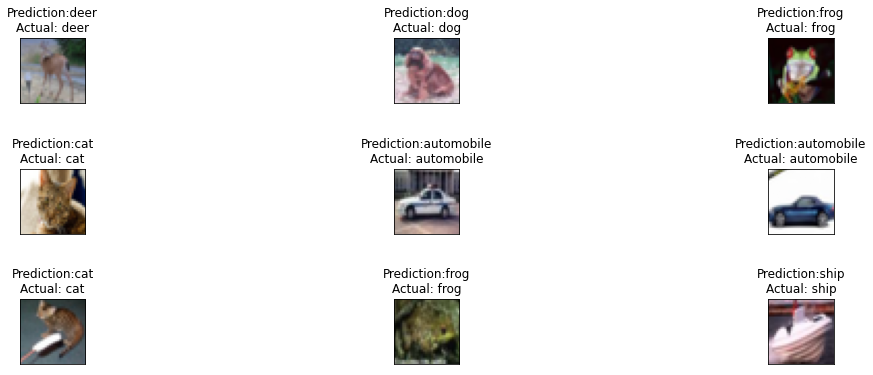

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace = 1)
axs=axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title="Prediction:{}\nActual: {}".format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)


  axs[i].imshow(img)

plt.show()